In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "abdelkabirmenani99"
os.environ['KAGGLE_KEY'] = "kaggle_key"

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:09<00:00, 147MB/s]
100% 1.21G/1.21G [00:09<00:00, 131MB/s]


In [ ]:
!unzip 'gtzan-dataset-music-genre-classification'

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/


In [ ]:
#path that contains folder you want to copy
%cp -av /content/Data /content/drive/MyDrive/genre_classification

'/content/Data' -> '/content/drive/MyDrive/genre_classification/Data'
'/content/Data/features_30_sec.csv' -> '/content/drive/MyDrive/genre_classification/Data/features_30_sec.csv'
'/content/Data/features_3_sec.csv' -> '/content/drive/MyDrive/genre_classification/Data/features_3_sec.csv'
'/content/Data/genres_original' -> '/content/drive/MyDrive/genre_classification/Data/genres_original'
'/content/Data/genres_original/blues' -> '/content/drive/MyDrive/genre_classification/Data/genres_original/blues'
'/content/Data/genres_original/blues/blues.00000.wav' -> '/content/drive/MyDrive/genre_classification/Data/genres_original/blues/blues.00000.wav'
'/content/Data/genres_original/blues/blues.00001.wav' -> '/content/drive/MyDrive/genre_classification/Data/genres_original/blues/blues.00001.wav'
'/content/Data/genres_original/blues/blues.00002.wav' -> '/content/drive/MyDrive/genre_classification/Data/genres_original/blues/blues.00002.wav'
'/content/Data/genres_original/blues/blues.00003.wav' -> '

# Music Genre Classification


Used libraries:
- librosa, librosa.display
- matplotlib
- numpy
- os
- math
- json

In [10]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import random
import math

In [11]:
example_file = "/content/drive/MyDrive/genre_classification/Data/genres_original/disco/disco.00001.wav"

In [12]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [13]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [14]:
print(sample_rate)

22050


In [15]:
FIG_SIZE = (16,8)

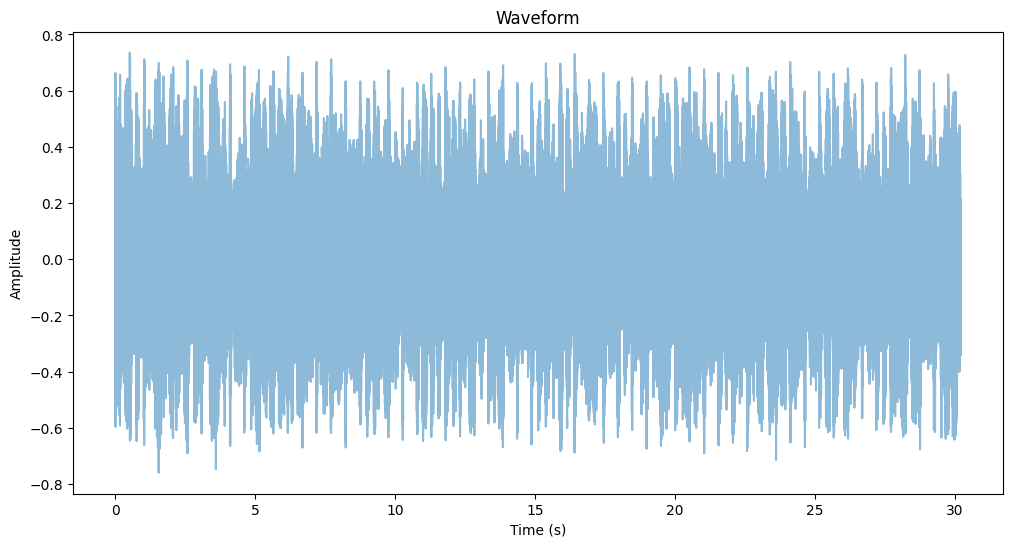

In [16]:
time = np.arange(0, len(signal)) / sample_rate
plt.figure(figsize=(12, 6))
plt.plot(time, signal, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

In [17]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [18]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [19]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

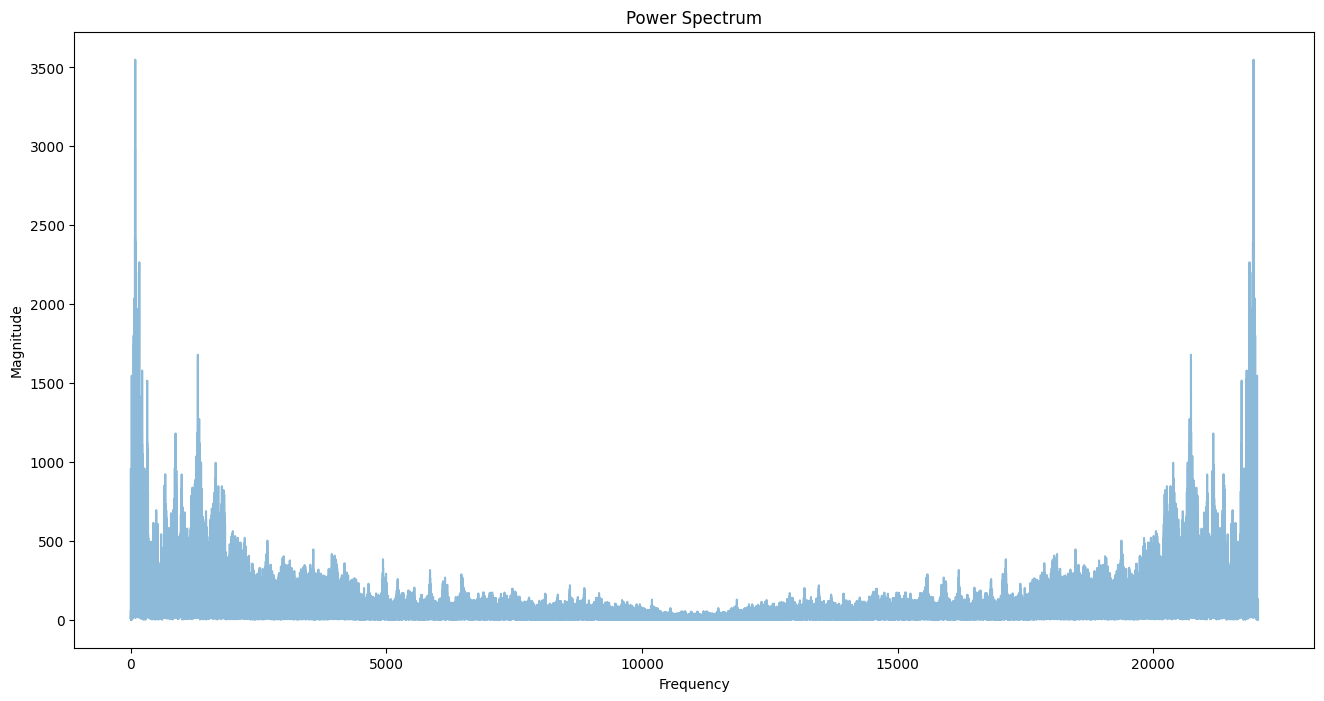

In [20]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [21]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

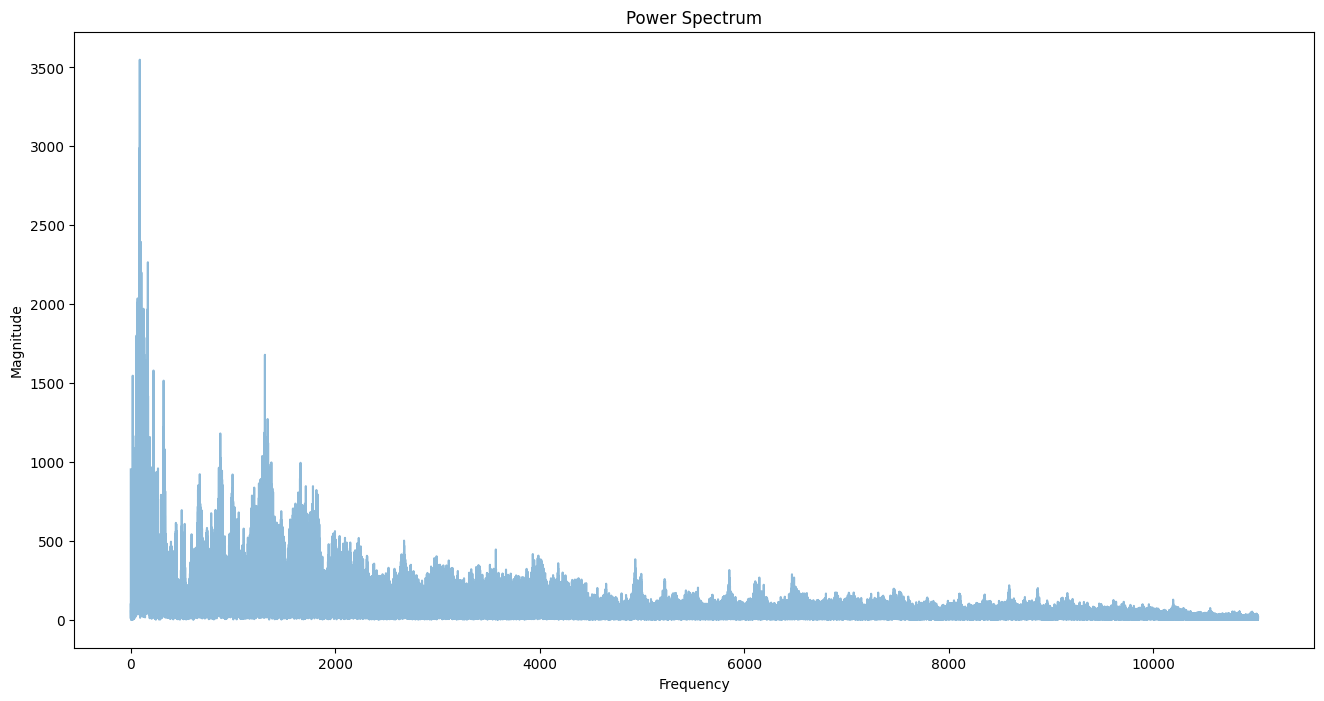

In [22]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [23]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [24]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [25]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

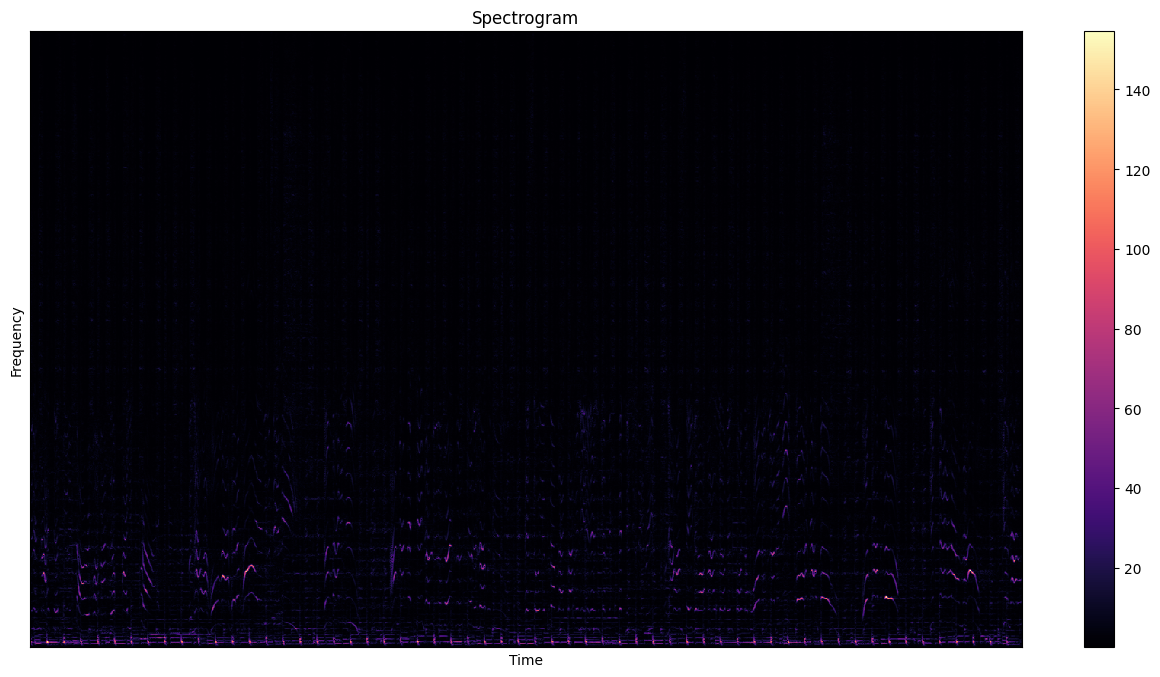

In [26]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [27]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

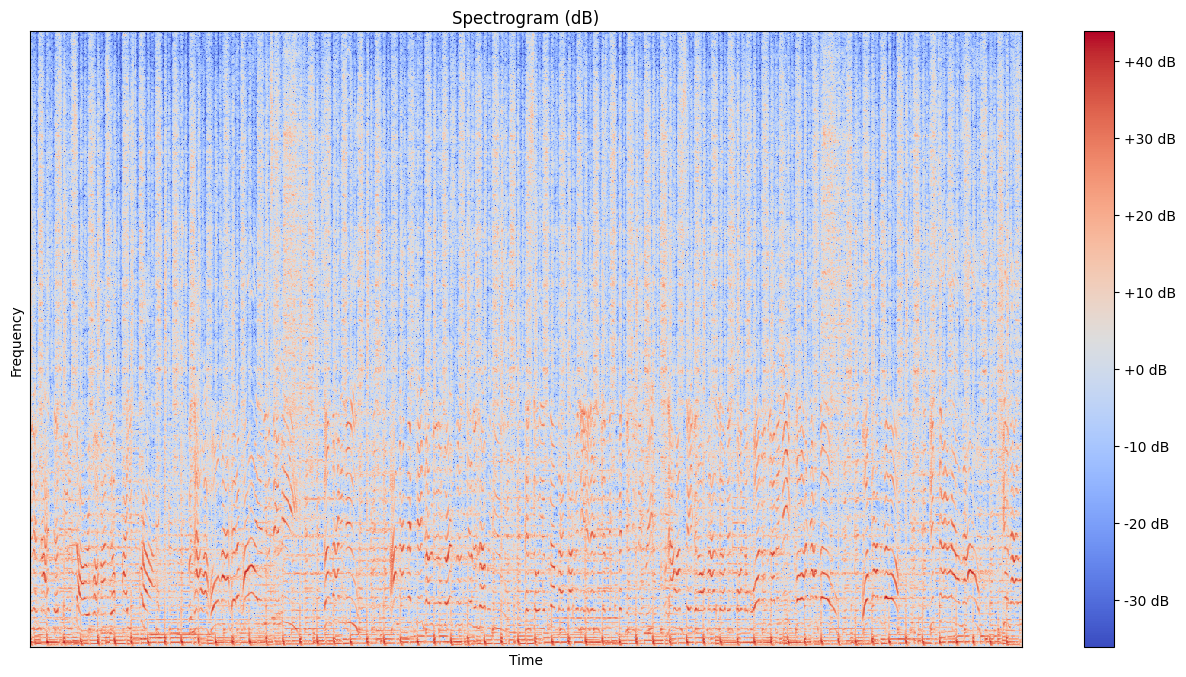

In [28]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [29]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

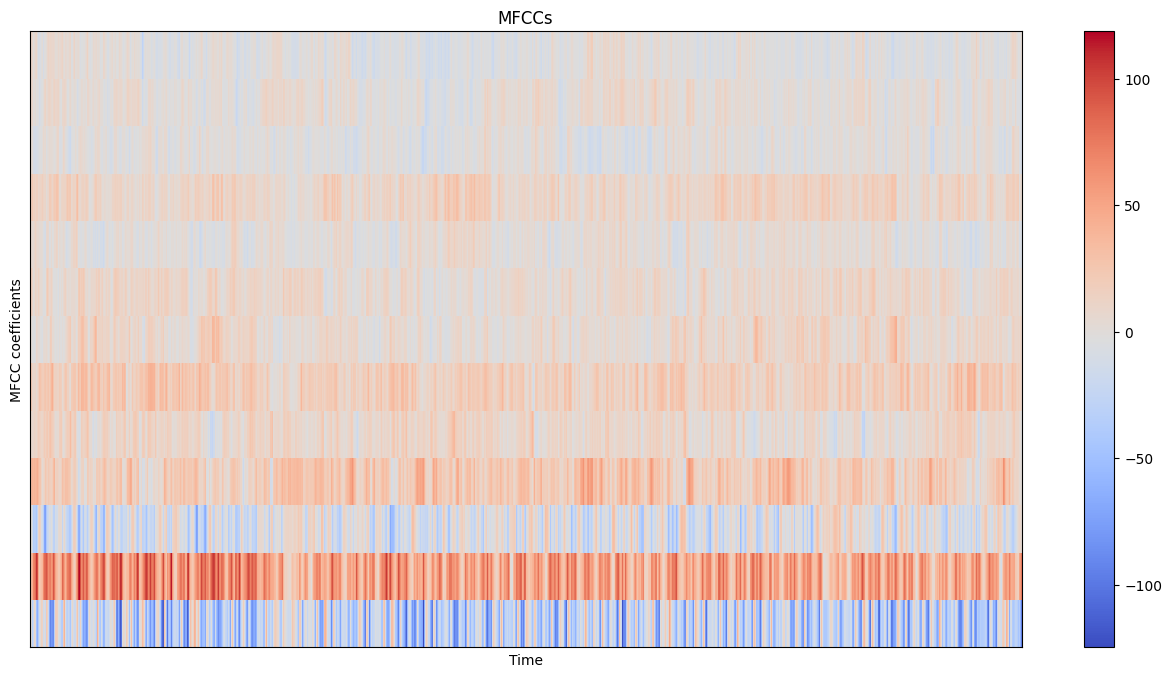

In [30]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [31]:
import json
import os
import math

In [32]:
DATASET_PATH = "/content/drive/MyDrive/genre_classification/Data/genres_original"
JSON_PATH = "/content/drive/MyDrive/genre_classification/Data/data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [33]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
  """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
  data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

  samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
  true_index = 0
  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    if os.path.basename(dirpath) == ".ipynb_checkpoints":
      continue  # Skip this directory
    # ensure we're processing a genre sub-folder level
    elif dirpath is not dataset_path:
      true_index += 1
      # save genre label (i.e., sub-folder name) in the mapping
      semantic_label = dirpath.split("/")[-1]
      data["mapping"].append(semantic_label)
      print("\nProcessing: {}".format(semantic_label))
      # process all audio files in genre sub-dir
      for f in filenames:
		  # load audio file
        file_path = os.path.join(dirpath, f)
        signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
        # process all segments of audio file
        for d in range(num_segments):
          # calculate start and finish sample for current segment
          start = samples_per_segment * d
          finish = start + samples_per_segment
          # extract mfcc
          mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
          mfcc = mfcc.T
          # store only mfcc feature with expected number of vectors
          if len(mfcc) == num_mfcc_vectors_per_segment:
              data["mfcc"].append(mfcc.tolist())
              data["labels"].append(true_index-1)
              print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [34]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
Processing: jazz
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:1
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:2
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:3
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:4
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:5
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:6
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:7
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:8
/content/drive/MyDrive/genre_classification/Data/genres_original/jazz/jazz.00004.wav, segment:9
/content/drive/MyDrive/genre_classification/Data/genres_original/jaz

### Load Data

In [35]:
# path to json
DATA_PATH = "/content/drive/MyDrive/genre_classification/Data/data_10.json"

In [36]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [37]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [38]:
y[:-1]

array([0, 0, 0, ..., 9, 9, 9])

In [39]:
X.shape

(9986, 130, 13)

In [40]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Simple ANN

In [41]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [42]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [44]:
y_train[:20]

array([6, 3, 3, 5, 2, 3, 9, 0, 3, 9, 6, 9, 5, 5, 9, 3, 6, 3, 5, 8])

In [45]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=6, monitor='val_loss', mode='auto')

In [46]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50,callbacks=[early_stopping])

Epoch 1/50
219/219 [==============================] - 8s 6ms/step - loss: 8.1286 - accuracy: 0.2831 - val_loss: 2.4131 - val_accuracy: 0.2894
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 2.1175 - accuracy: 0.3133 - val_loss: 2.0634 - val_accuracy: 0.3385
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 1.8511 - accuracy: 0.3671 - val_loss: 2.0121 - val_accuracy: 0.3548
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 1.7228 - accuracy: 0.3927 - val_loss: 2.1341 - val_accuracy: 0.3218
Epoch 5/50
219/219 [==============================] - 1s 7ms/step - loss: 1.6717 - accuracy: 0.4016 - val_loss: 1.9743 - val_accuracy: 0.3672
Epoch 6/50
219/219 [==============================] - 1s 7ms/step - loss: 1.5935 - accuracy: 0.4373 - val_loss: 2.0752 - val_accuracy: 0.3541
Epoch 7/50
219/219 [==============================] - 1s 6ms/step - loss: 1.4870 - accuracy: 0.4757 - val_loss: 1.9053 - val_accuracy: 0.4065
Epoch 

In [47]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

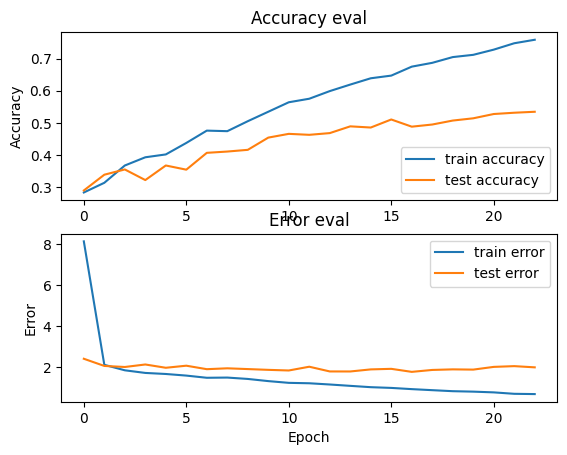

In [48]:
# plot accuracy and error as a function of the epochs
plot_history(history)

### Managing Overfitting

In [49]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [50]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=100,callbacks=[early_stopping])

Epoch 1/100
110/110 [==============================] - 2s 7ms/step - loss: 19.3850 - accuracy: 0.1575 - val_loss: 3.5392 - val_accuracy: 0.1332
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 5.0374 - accuracy: 0.1336 - val_loss: 3.4948 - val_accuracy: 0.1165
Epoch 3/100
110/110 [==============================] - 1s 6ms/step - loss: 4.0180 - accuracy: 0.1232 - val_loss: 3.4912 - val_accuracy: 0.1172
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 3.7449 - accuracy: 0.1296 - val_loss: 3.4792 - val_accuracy: 0.1182
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 3.6043 - accuracy: 0.1411 - val_loss: 3.4632 - val_accuracy: 0.1235
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 3.5528 - accuracy: 0.1544 - val_loss: 3.4491 - val_accuracy: 0.1315
Epoch 7/100
110/110 [==============================] - 1s 9ms/step - loss: 3.5379 - accuracy: 0.1585 - val_loss: 3.4359 - val_accuracy: 0.137

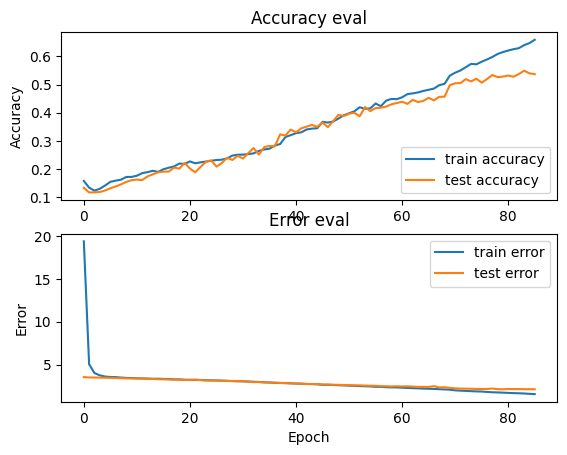

In [52]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [53]:
# perform prediction
yhat= model_regularized.predict(X_test)

94/94 [==============================] - 0s 3ms/step


In [54]:
m=[]
for probs in yhat:
    predicted_class = np.argmax(probs)
    m.append(predicted_class)
y_hat = np.array(m)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pylab
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[142  32  32  12   4  23  15   0   7  14]
 [  1 294   9   0   0  11   0   0   0   1]
 [ 32  35 116  19   2  37   1   4  15  22]
 [ 17   4  19 153  29   5   4  15  21  26]
 [ 26   6   5  26 126   7  12  30  64  10]
 [ 10 156  35   3   1  68   1   1   8   5]
 [ 37   2   1   9  10   1 237   0   6  17]
 [  4  11   6  15  23  11   0 223  10   3]
 [ 10  14   7  23  32  17   5   6 172  11]
 [ 54  12  38  43  18  26  12   3  17  77]]


In [56]:
def plot_confusion_matrix(cm, genre_list):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=np.max(cm))
    ax = plt.gca()
    ax.set_xticks(np.arange(len(genre_list)))
    ax.set_yticks(np.arange(len(genre_list)))
    ax.set_xticklabels(genre_list, rotation=45, ha='right')  # Rotate the x-axis labels if needed
    ax.set_yticklabels(genre_list)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    plt.grid(False)
    plt.show()

In [57]:
with open("/content/drive/MyDrive/genre_classification/Data/data_10.json", "r") as f:
    data = json.load(f)

In [58]:
genre_list=data['mapping'].copy()

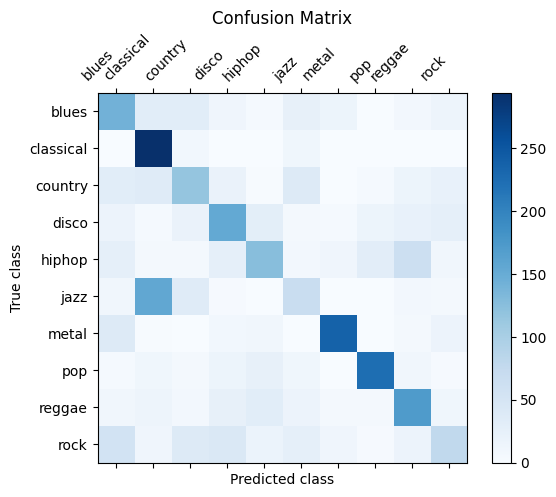

In [59]:
plot_confusion_matrix(cm, genre_list)

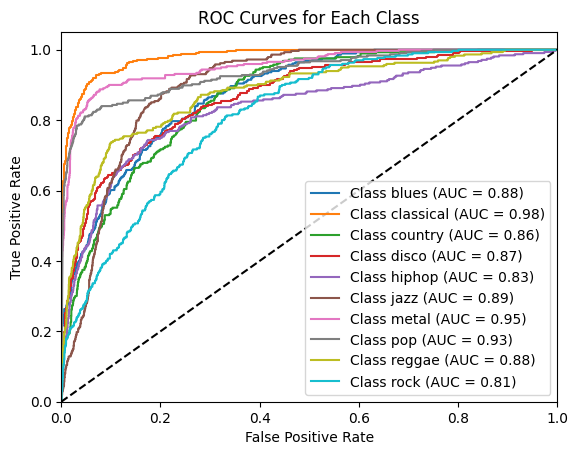

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_classes = len(genre_list)
class_labels = np.unique(y_test)

plt.figure()

for i in range(n_classes):
    # Get the scores and true labels for the current class
    scores = yhat[:, i]
    true_labels = (y_test == class_labels[i]).astype(int)

    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'Class {genre_list[class_labels[i]]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

# Convolutional Neural Network

In [61]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [62]:
X_train.shape

(5991, 130, 13, 1)

In [63]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [64]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [65]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [67]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=50,callbacks=[early_stopping])

Epoch 1/50
94/94 [==============================] - 10s 12ms/step - loss: 2.6727 - accuracy: 0.1858 - val_loss: 2.1273 - val_accuracy: 0.2543
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 2.0706 - accuracy: 0.2948 - val_loss: 1.7639 - val_accuracy: 0.3765
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 1.8033 - accuracy: 0.3754 - val_loss: 1.5756 - val_accuracy: 0.4219
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 1.6747 - accuracy: 0.4173 - val_loss: 1.4568 - val_accuracy: 0.4733
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 1.5775 - accuracy: 0.4392 - val_loss: 1.3865 - val_accuracy: 0.5013
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 1.4830 - accuracy: 0.4715 - val_loss: 1.3102 - val_accuracy: 0.5334
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 1.4190 - accuracy: 0.4932 - val_loss: 1.2755 - val_accuracy: 0.5447
Epoch 8/50
94/94 [

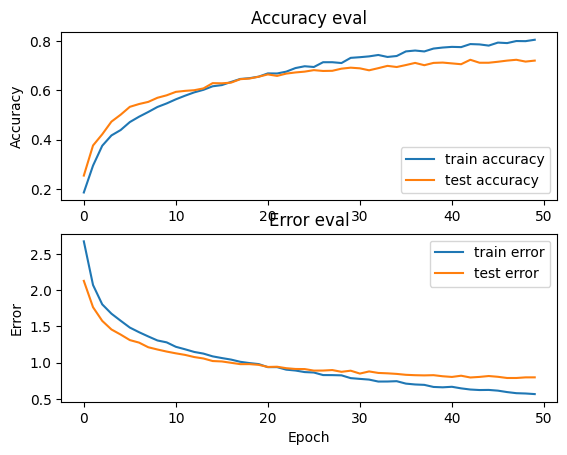

In [68]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [69]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.7204 - accuracy: 0.7425 - 494ms/epoch - 6ms/step

Test accuracy: 0.7424910068511963


In [70]:
# perform prediction
yhat= model_cnn.predict(X_test)

79/79 [==============================] - 0s 3ms/step


In [71]:
m=[]
for probs in yhat:
    predicted_class = np.argmax(probs)
    m.append(predicted_class)
y_hat = np.array(m)

In [72]:
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[214   1   8   5   4   0   4   0   2   5]
 [  1 247   2   0   0  10   2   0   1   3]
 [ 30   0 143  11   0  12   2   3   3  43]
 [  8   1   8 168   7   0   4  15  12  18]
 [  8   0   1  16 189   2   9  13  19   0]
 [  6  13  11   0   0 199   3   1   1  20]
 [ 12   0   2   4   7   1 204   0   1  22]
 [  0   1  13   8   8   1   0 181   1  10]
 [ 13   1   5  28  27   5   2  14 174   8]
 [ 25   1  24  19   5  12   6   2   7 135]]


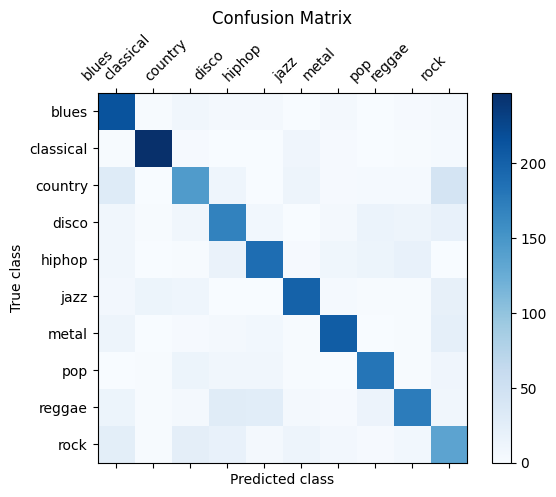

In [73]:
plot_confusion_matrix(cm, genre_list)

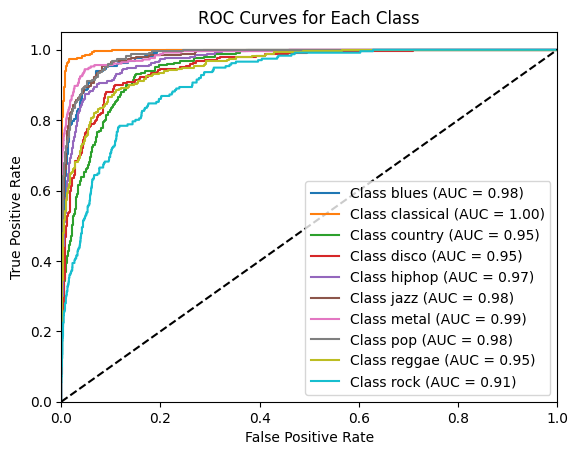

In [74]:
n_classes = len(genre_list)
class_labels = np.unique(y_test)

plt.figure()

for i in range(n_classes):
    # Get the scores and true labels for the current class
    scores = yhat[:, i]
    true_labels = (y_test == class_labels[i]).astype(int)

    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'Class {genre_list[class_labels[i]]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_cnn.save("Music_Genre_10_CNN")

Voir les mals prédictions du modèle:

In [75]:
for n in range(15):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", genre_list[y_to_predict])

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", genre_list[int(predicted_index)])


Real Genre: rock
1/1 [==============================] - 0s 18ms/step
Predicted Genre: rock

Real Genre: pop
1/1 [==============================] - 0s 21ms/step
Predicted Genre: disco

Real Genre: blues
1/1 [==============================] - 0s 18ms/step
Predicted Genre: blues

Real Genre: disco
1/1 [==============================] - 0s 19ms/step
Predicted Genre: reggae

Real Genre: pop
1/1 [==============================] - 0s 20ms/step
Predicted Genre: country

Real Genre: disco
1/1 [==============================] - 0s 25ms/step
Predicted Genre: disco

Real Genre: pop
1/1 [==============================] - 0s 17ms/step
Predicted Genre: pop

Real Genre: reggae
1/1 [==============================] - 0s 17ms/step
Predicted Genre: reggae

Real Genre: disco
1/1 [==============================] - 0s 20ms/step
Predicted Genre: disco

Real Genre: hiphop
1/1 [==============================] - 0s 19ms/step
Predicted Genre: reggae

Real Genre: jazz
1/1 [==============================] - 0s 19m

### Try CNN model with 15 segments

In [25]:
JSON_PATH = "/content/drive/MyDrive/genre_classification/Data/data_15.json"

In [76]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=15)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:1
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:2
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:3
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:4
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:5
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:6
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:7
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:8
/content/drive/MyDrive/genre_classification/Data/genres_original/metal/metal.00069.wav, segment:9
/content/drive/MyDrive/genre_classification/Data/genres_original/me

In [77]:
# path to json
DATA_PATH1 = "/content/drive/MyDrive/genre_classification/Data/data_15.json"

In [78]:
# load data
X, y = load_data(DATA_PATH1)

Data succesfully loaded!


In [79]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [80]:
X_train.shape

(8985, 87, 13, 1)

In [81]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [82]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [83]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 85, 11, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 43, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 41, 4, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 21, 2, 32)        0         
 2D)                                                             
                                                      

In [85]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=100,callbacks=[early_stopping])

Epoch 1/100
141/141 [==============================] - 5s 11ms/step - loss: 2.5896 - accuracy: 0.1814 - val_loss: 2.0881 - val_accuracy: 0.2688
Epoch 2/100
141/141 [==============================] - 1s 6ms/step - loss: 1.9532 - accuracy: 0.3233 - val_loss: 1.6549 - val_accuracy: 0.4148
Epoch 3/100
141/141 [==============================] - 1s 8ms/step - loss: 1.7165 - accuracy: 0.3962 - val_loss: 1.4669 - val_accuracy: 0.4709
Epoch 4/100
141/141 [==============================] - 1s 8ms/step - loss: 1.5893 - accuracy: 0.4335 - val_loss: 1.3819 - val_accuracy: 0.5016
Epoch 5/100
141/141 [==============================] - 1s 8ms/step - loss: 1.4794 - accuracy: 0.4717 - val_loss: 1.3093 - val_accuracy: 0.5332
Epoch 6/100
141/141 [==============================] - 1s 8ms/step - loss: 1.4186 - accuracy: 0.4828 - val_loss: 1.2514 - val_accuracy: 0.5532
Epoch 7/100
141/141 [==============================] - 1s 6ms/step - loss: 1.3470 - accuracy: 0.5156 - val_loss: 1.2049 - val_accuracy: 0.572

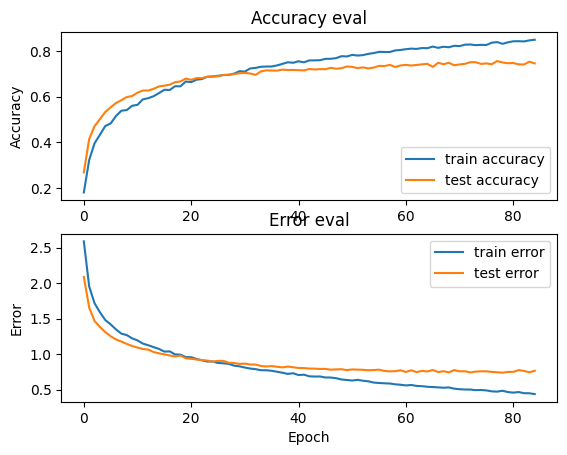

In [86]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [87]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

117/117 - 0s - loss: 0.7270 - accuracy: 0.7527 - 389ms/epoch - 3ms/step

Test accuracy: 0.75267094373703


In [88]:
# perform prediction
yhat= model_cnn.predict(X_test)

117/117 [==============================] - 0s 2ms/step


In [89]:
m=[]
for probs in yhat:
    predicted_class = np.argmax(probs)
    m.append(predicted_class)
y_hat = np.array(m)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pylab
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[349   1   5  11   4  12   9   0   0  16]
 [  0 342   3   0   0   7   0   0   1   1]
 [ 45  12 219  23   1  18   5   9  10  46]
 [ 13   3   9 241  16   0  12  25  15  36]
 [ 18   2   2   8 268   2  10  29  31   5]
 [ 15  30   6   0   2 331   0   0   1   7]
 [ 15   1   1   2   8   1 336   0   0  21]
 [  0   4   7  13   8   1   0 316  10   4]
 [  6   0   9  27  33   6   2  23 226  29]
 [ 36   4  24  30   1   9  22  25   8 190]]


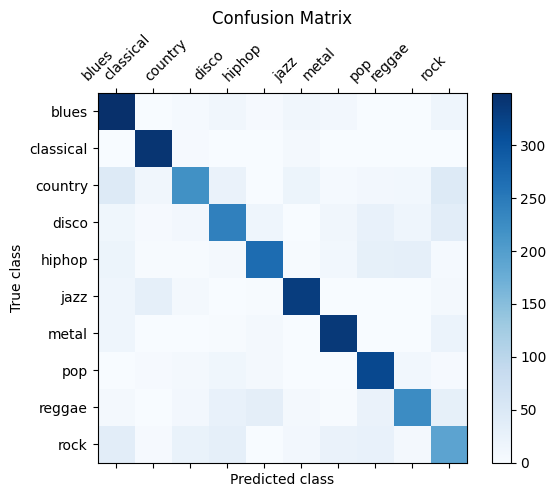

In [91]:
plot_confusion_matrix(cm, genre_list)

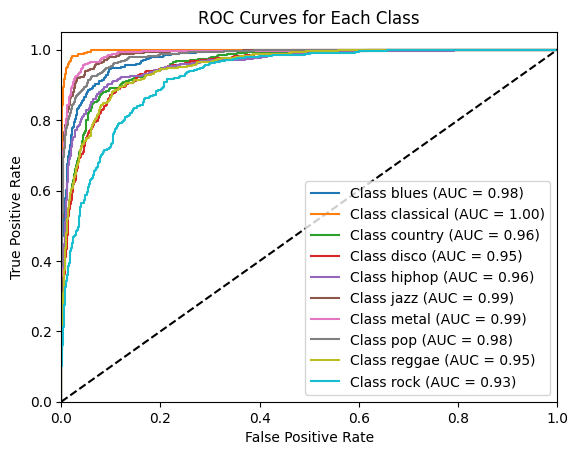

In [92]:
n_classes = len(genre_list)
class_labels = np.unique(y_test)

plt.figure()

for i in range(n_classes):
    # Get the scores and true labels for the current class
    scores = yhat[:, i]
    true_labels = (y_test == class_labels[i]).astype(int)

    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'Class {genre_list[class_labels[i]]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_cnn.save("Music_Genre_15_CNN")

Voir les mals prédictions du modèle:

In [93]:
for n in range(15):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", genre_list[y_to_predict])

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", genre_list[int(predicted_index)])


Real Genre: pop
1/1 [==============================] - 0s 254ms/step
Predicted Genre: pop

Real Genre: hiphop
1/1 [==============================] - 0s 29ms/step
Predicted Genre: metal

Real Genre: jazz
1/1 [==============================] - 0s 31ms/step
Predicted Genre: classical

Real Genre: pop
1/1 [==============================] - 0s 30ms/step
Predicted Genre: pop

Real Genre: rock
1/1 [==============================] - 0s 39ms/step
Predicted Genre: jazz

Real Genre: metal
1/1 [==============================] - 0s 31ms/step
Predicted Genre: metal

Real Genre: metal
1/1 [==============================] - 0s 35ms/step
Predicted Genre: metal

Real Genre: blues
1/1 [==============================] - 0s 33ms/step
Predicted Genre: blues

Real Genre: jazz
1/1 [==============================] - 0s 32ms/step
Predicted Genre: jazz

Real Genre: country
1/1 [==============================] - 0s 51ms/step
Predicted Genre: disco

Real Genre: reggae
1/1 [==============================] - 0s 27m